<a href="https://colab.research.google.com/github/sureshakukkaje/Python-ML/blob/master/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraries

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
import warnings
warnings.filterwarnings('ignore')

Reading Dataset

In [0]:
data=pd.read_csv('creditcard.csv')

In [12]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


Null Values

In [13]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        1
V8        1
V9        1
V10       1
V11       1
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

Removing Null Values

In [0]:
data=np.round(data.fillna(data.mean()),1)

Information

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31780 entries, 0 to 31779
Data columns (total 31 columns):
Time      31780 non-null int64
V1        31780 non-null float64
V2        31780 non-null float64
V3        31780 non-null float64
V4        31780 non-null float64
V5        31780 non-null float64
V6        31780 non-null float64
V7        31780 non-null float64
V8        31780 non-null float64
V9        31780 non-null float64
V10       31780 non-null float64
V11       31780 non-null float64
V12       31780 non-null float64
V13       31780 non-null float64
V14       31780 non-null float64
V15       31780 non-null float64
V16       31780 non-null float64
V17       31780 non-null float64
V18       31780 non-null float64
V19       31780 non-null float64
V20       31780 non-null float64
V21       31780 non-null float64
V22       31780 non-null float64
V23       31780 non-null float64
V24       31780 non-null float64
V25       31780 non-null float64
V26       31780 non-null float64
V2

Descriptive Statistics

In [16]:
data.describe().T.head()

,count,mean,std,min,25%,50%,75%,max
Time,31780.0,22329.432410,12184.540274,0.0,10971.0,27331.0,32942.0,36513.0
V1,31780.0,-0.212665,1.855180,-30.6,-1.0,-0.2,1.2,2.0
V2,31780.0,0.104836,1.547420,-41.0,-0.5,0.1,0.8,16.7
V3,31780.0,0.721750,1.590338,-31.1,0.3,0.8,1.5,4.1
V4,31780.0,0.211076,1.420669,-5.2,-0.7,0.2,1.1,13.1


In [17]:
data.shape

(31780, 31)

In [18]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

Fraud Cases and Genuine Cases

In [0]:
fraud_cases=len(data[data['Class']==1])

In [20]:
print(' Number of Fraud Cases:',fraud_cases)

 Number of Fraud Cases: 102


In [0]:
non_fraud_cases=len(data[data['Class']==0])

In [22]:
print('Number of Non Fraud Cases:',non_fraud_cases)

Number of Non Fraud Cases: 31678


In [0]:
fraud=data[data['Class']==1]

In [0]:
genuine=data[data['Class']==0]

In [25]:
fraud.Amount.describe()

count     102.000000
mean       91.243137
std       248.275628
min         0.000000
25%         1.000000
50%         3.450000
75%       100.000000
max      1809.700000
Name: Amount, dtype: float64

In [26]:
genuine.Amount.describe()

count    31678.000000
mean        81.085886
std        223.068222
min          0.000000
25%          6.900000
50%         20.000000
75%         73.600000
max       7879.400000
Name: Amount, dtype: float64

Exploratory Data Analysis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe8ce6006d8>,
      dtype=object)

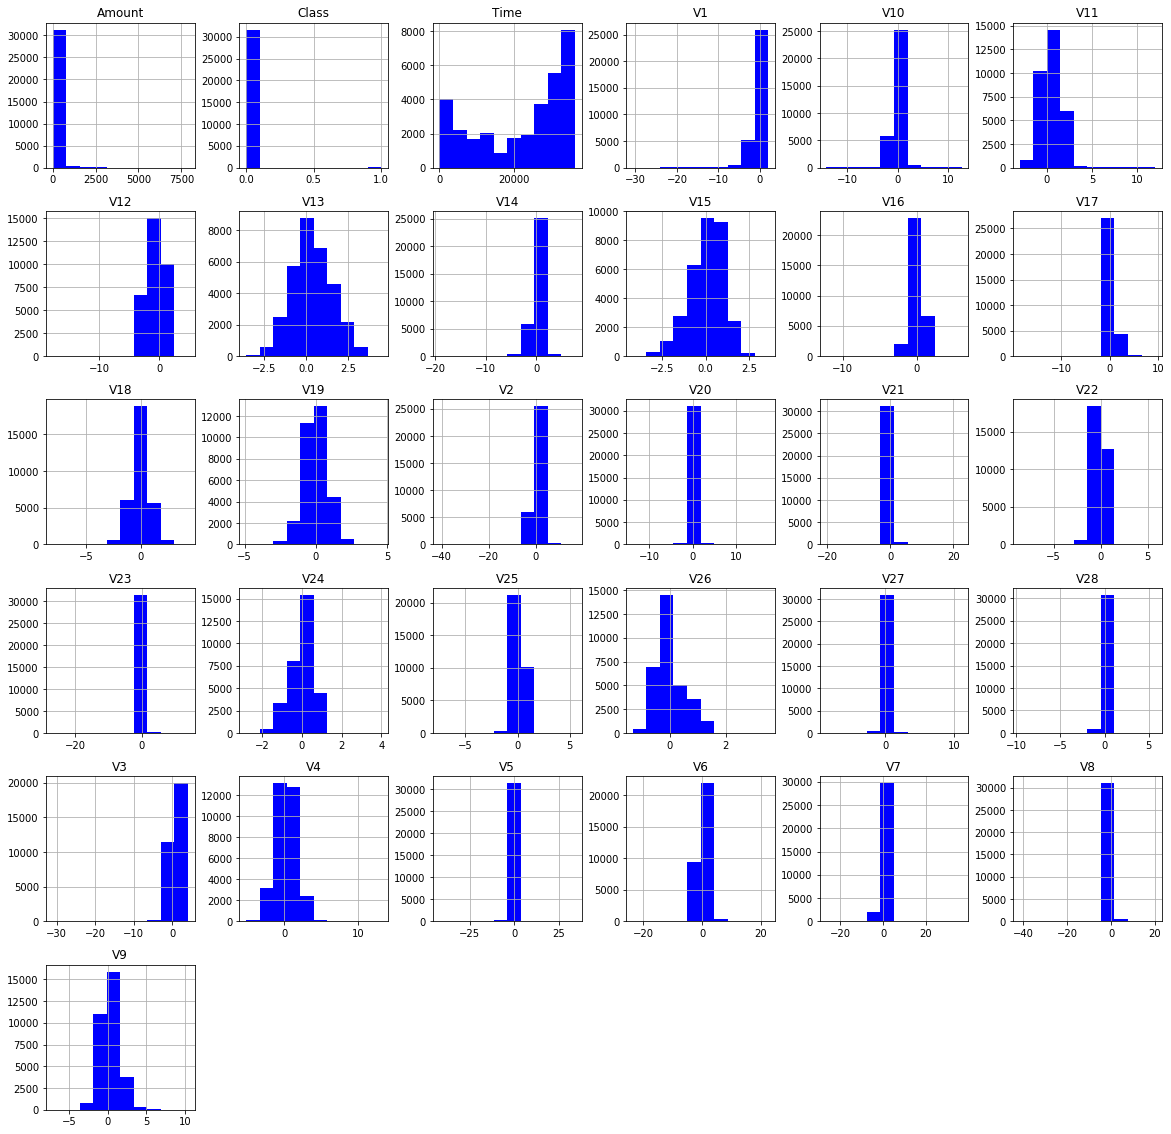

In [27]:
data.hist(figsize=(20,20),color='blue')
plt.show()

Text(0.5, 0.98, 'Time of transaction vs Amount by class')

Text(0.5, 1.0, 'Fraud')

Text(0.5, 1.0, 'Genuine')

Text(0.5, 0, 'Time (in Seconds)')

Text(0, 0.5, 'Amount')

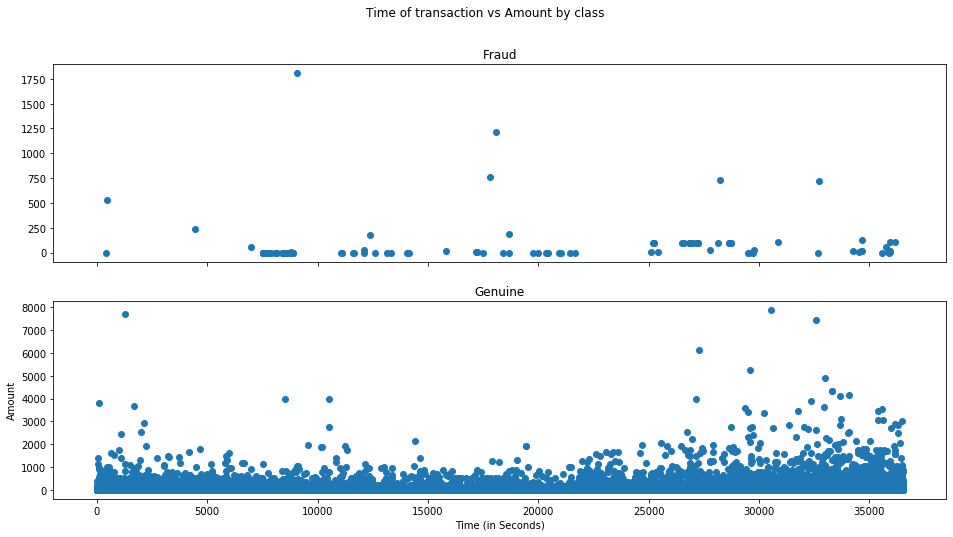

In [28]:
rcParams['figure.figsize'] = 16, 8
f,(ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(genuine.Time, genuine.Amount)
ax2.set_title('Genuine')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

Correlation

<Figure size 720x576 with 0 Axes>

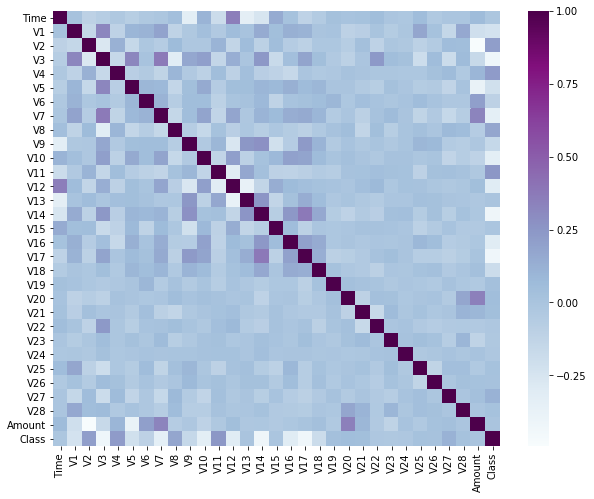

In [29]:
plt.figure(figsize=(10,8))
corr=data.corr()
sns.heatmap(corr,cmap='BuPu')

Modeling

Random Forest

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X=data.drop(['Class'],axis=1)

In [0]:
y=data['Class']

In [0]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=123)

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
rfc=RandomForestClassifier()

In [0]:
model=rfc.fit(X_train,y_train)

In [0]:
prediction=model.predict(X_test)

In [0]:
from sklearn.metrics import accuracy_score

In [39]:
accuracy_score(y_test,prediction)

0.999160897839312

Logistic Regression

In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
X1=data.drop(['Class'],axis=1)

In [0]:
y1=data['Class']

In [0]:
X1_train,X1_test,y1_train,y1_test=train_test_split(X1,y1,test_size=0.3,random_state=123)

In [0]:
lr=LogisticRegression()

In [0]:
model2=lr.fit(X1_train,y1_train)

In [0]:
prediction2=model2.predict(X1_test)

In [49]:
accuracy_score(y1_test,prediction2)

0.9981120201384519

Decision Tree

In [0]:
from sklearn.tree import DecisionTreeRegressor

In [0]:
X2=data.drop(['Class'],axis=1)

In [0]:
y2=data['Class']

In [0]:
dt=DecisionTreeRegressor()

In [0]:
X2_train,X2_test,y2_train,y2_test=train_test_split(X2,y2,test_size=0.3,random_state=123)

In [0]:
model3=dt.fit(X2_train,y2_train)

In [0]:
prediction3=model3.predict(X2_test)

In [57]:
accuracy_score(y2_test,prediction3)

0.998846234529054

In [0]:
#Splitting the data into train and test set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [94]:
#Predicting using Logistic Regression for Binary classification 
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train,y_train) #fitting the model 
y_pred = LR.predict(X_test) #prediction

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [95]:
#extracting true_positives, false_positives, true_negatives, false_negatives
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

True Negatives:  9496
False Positives:  11
False Negatives:  14
True Positives:  13


In [96]:
#Accuracy
Accuracy = (tn+tp)*100/(tp+tn+fp+fn) 
print("Accuracy {:0.2f}".format(Accuracy))

Accuracy 99.74


In [97]:
#Precision 
Precision = tp/(tp+fp) 
print("Precision {:0.2f}".format(Precision))

Precision 0.54


In [98]:
#Recall 
Recall = tp/(tp+fn) 
print("Recall {:0.2f}".format(Recall))

Recall 0.48


In [99]:
#F1 Score
f1 = (2*Precision*Recall)/(Precision + Recall)
print("F1 Score {:0.2f}".format(f1))

F1 Score 0.51
